# Proyek Analisis Data: Bike Sharing
- Nama: Muhammad Salman Ikrar Musyaffa'
- Email: salman.ikrar5@gmail.com
- Id Dicoding: salman2010

## Menentukan Pertanyaan Bisnis

- Pada jam berapa bike sharing paling banyak mendapatkan order per tahunnya?
- Pada musim apa bike sharing paling banyak mendapatkan order per tahunnya?

## Menyaipkan semua library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Melakukan import library yang akan digunakan

## Data Wrangling

### Gathering Data

In [ ]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Salmanim20/bike-sharing/main/Bike-sharing-dataset/hour.csv")

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Melakukan read csv untuk membuat Dataframe dari file csv yang dibaca

### Assessing Data

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Melihat gambaran info secara umum dari dataframe yang dibuat melalui fungsi info dan describe

### Cleaning Data

In [ ]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Melakukan pengecekan apakah terdapat nilai null pada dataframe

In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Melakukan pengecekan apakah terdapat duplikasi dari record yang terdapat di dataframe

In [ ]:
hour_df.rename(columns={"instant":"id","dteday":"date", "yr":"year", "mnth":"month", "hr":"hour", "weekday":"day", "weathersit":"weather", "hum":"humidity", "cnt":"total_count"}, inplace=True)

Melakukan perubahan nama kolom dengan menggunakan fungsi rename

In [ ]:
hour_df['date'] = pd.to_datetime(hour_df['date'])
hour_df['season'] = hour_df['season'].astype('category')
hour_df['month'] = hour_df['month'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['day'] = hour_df['day'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weather'] = hour_df['weather'].astype('category')

Melakukan perubahan type data dari beberapa kolom pada dataframe

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   year         17379 non-null  int64         
 4   month        17379 non-null  category      
 5   hour         17379 non-null  int64         
 6   holiday      17379 non-null  category      
 7   day          17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weather      17379 non-null  category      
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  humidity     17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  tota

In [ ]:
hour_df['season'] = hour_df['season'].replace([1, 2, 3, 4], ['Springer', 'Summer', 'Fall', 'Winter'])
hour_df['year'] = hour_df['year'].replace([0, 1], [2011, 2012])
hour_df['month'] = hour_df['month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Des'])
hour_df['holiday'] = hour_df['holiday'].replace([0, 1], ['No', 'Yes'])
hour_df['day'] = hour_df['day'].replace([0, 1, 2, 3, 4, 5, 6], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
hour_df['workingday'] = hour_df['workingday'].replace([0, 1], ['No', 'Yes'])
hour_df['weather'] = hour_df['weather'].replace([1, 2, 3, 4], ['Clear', 'Misty', 'Light Snow/Rain', 'Heavy Snow/Rain'])

Merubah beberapa value dari beberapa kolom agar dapat lebih mudah dipahami

In [ ]:
hour_df['temp'] = hour_df['temp'] * 41
hour_df['atemp'] = hour_df['atemp'] * 50
hour_df['humidity'] = hour_df['humidity'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67

Mengembalikan nilai dari beberapa kolom sebelum dinormalisasi

In [ ]:
hour_df

,id,date,season,year,month,hour,holiday,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Springer,2011,Jan,0,No,Saturday,No,Clear,9.84,14.395,81.0,0.0000,3,13,16
1,2,2011-01-01,Springer,2011,Jan,1,No,Saturday,No,Clear,9.02,13.635,80.0,0.0000,8,32,40
2,3,2011-01-01,Springer,2011,Jan,2,No,Saturday,No,Clear,9.02,13.635,80.0,0.0000,5,27,32
3,4,2011-01-01,Springer,2011,Jan,3,No,Saturday,No,Clear,9.84,14.395,75.0,0.0000,3,10,13
4,5,2011-01-01,Springer,2011,Jan,4,No,Saturday,No,Clear,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Springer,2012,Des,19,No,Monday,Yes,Misty,10.66,12.880,60.0,11.0014,11,108,119
17375,17376,2012-12-31,Springer,2012,Des,20,No,Monday,Yes,Misty,10.66,12.880,60.0,11.0014,8,81,89
17376,17377,2012-12-31,Springer,2012,Des,21,No,Monday,Yes,Clear,10.66,12.880,60.0,11.0014,7,83,90
17377,17378,2012-12-31,Springer,2012,Des,22,No,Monday,Yes,Clear,10.66,13.635,56.0,8.9981,13,48,61


## Exploratory Data Analysis (EDA)

In [ ]:
hour_df.describe(include='all')

<ipython-input-14-8c27de8cc91c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include='all')


,id,date,season,year,month,hour,holiday,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,May,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,NaN,6.914405,NaN,NaN,NaN,NaN,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000


In [ ]:
hour_df.groupby(by='hour').agg({
    "total_count" : ["max", 'min', 'mean', 'std']
})

total_count                            
             max min        mean         std
hour                                        
0            283   2   53.898072   42.307910
1            168   1   33.375691   33.538727
2            132   1   22.869930   26.578642
3             79   1   11.727403   13.239190
4             28   1    6.352941    4.143818
5             66   1   19.889819   13.200765
6            213   1   76.044138   55.084348
7            596   1  212.064649  161.441936
8            839   5  359.011004  235.189285
9            426  14  219.309491   93.703458
10           539   8  173.668501  102.205413
11           663  10  208.143054  127.495536
12           776   3  253.315934  145.081134
13           760  11  253.661180  148.107657
14           750  12  240.949246  147.271574
15           750   7  251.233196  144.632541
16           783  11  311.983562  148.682618
17           976  15  461.452055  232.656611
18           977  23  425.510989  224.639304
19           743  11  311.523352  161.050359
20           567  11  226.030220  119.670164
21           584   6  172.314560   89.788893
22           502   9  131.335165   69.937782
23           256   2   87.831044   50.846889

Membuat pengelompokan dataframe berdasarkan kolom 'hour'

In [ ]:
count_by_hour = hour_df.groupby(by=['year', 'hour']).agg({
    'total_count':'sum'
})

In [ ]:
count_by_hour

total_count
year hour             
2011 0           15540
     1            9558
     2            6661
     3            3441
     4            1817
     5            5157
     6           20801
     7           56930
     8           95467
     9           59486
     10          47511
     11          56598
     12          69198
     13          69339
     14          66482
     15          68590
     16          85622
     17         127632
     18         116985
     19          85802
     20          62818
     21          48875
     22          37677
     23          25116
2012 0           23590
     1           14606
     2            9691
     3            4733
     4            2611
     5            9104
     6           34331
     7           97241
     8          165534
     9           99952
     10          78746
     11          94722
     12         115216
     13         115580
     14         109170
     15         114559
     16         142126
     17         209228
     18         192787
     19         140987
     20         101732
     21          76570
     22          57935
     23          38825

Membuat pengelompokan dataframe berdasarkan kolom 'year' dan 'hour' untuk dilihat jumlah value dari 'total_count'

In [ ]:
q1_hour_2011 = hour_df.query("year == 2011 and (hour == 1 or hour == 2 or hour == 3)")['total_count'].sum()
q2_hour_2011 = hour_df.query("year == 2011 and (hour == 4 or hour == 5 or hour == 6)")['total_count'].sum()
q3_hour_2011 = hour_df.query("year == 2011 and (hour == 7 or hour == 8 or hour == 9)")['total_count'].sum()
q4_hour_2011 = hour_df.query("year == 2011 and (hour == 10 or hour == 11 or hour == 12)")['total_count'].sum()
q5_hour_2011 = hour_df.query("year == 2011 and (hour == 13 or hour == 14 or hour == 15)")['total_count'].sum()
q6_hour_2011 = hour_df.query("year == 2011 and (hour == 16 or hour == 17 or hour == 18)")['total_count'].sum()
q7_hour_2011 = hour_df.query("year == 2011 and (hour == 19 or hour == 20 or hour == 21)")['total_count'].sum()
q8_hour_2011 = hour_df.query("year == 2011 and (hour == 22 or hour == 23 or hour == 0)")['total_count'].sum()

In [ ]:
temp_2011 = {'hour':['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-0'], 'total_count':[q1_hour_2011, q2_hour_2011, q3_hour_2011, q4_hour_2011, q5_hour_2011, q6_hour_2011, q7_hour_2011, q8_hour_2011], 'year':2011}

In [ ]:
q_hour_2011 = pd.DataFrame(temp_2011)

In [ ]:
q_hour_2011

,hour,total_count,year
0,0-3,19660,2011
1,3-6,27775,2011
2,6-9,211883,2011
3,9-12,173307,2011
4,12-15,204411,2011
5,15-18,330239,2011
6,18-21,197495,2011
7,21-0,78333,2011


Membuat dataframe baru untuk melihat jumlah value dari kolom 'total count' berdasarkan 3 hour nya dari tahun 2011

In [ ]:
q1_hour_2012 = hour_df.query("year == 2012 and (hour == 1 or hour == 2 or hour == 3)")['total_count'].sum()
q2_hour_2012 = hour_df.query("year == 2012 and (hour == 4 or hour == 5 or hour == 6)")['total_count'].sum()
q3_hour_2012 = hour_df.query("year == 2012 and (hour == 7 or hour == 8 or hour == 9)")['total_count'].sum()
q4_hour_2012 = hour_df.query("year == 2012 and (hour == 10 or hour == 11 or hour == 12)")['total_count'].sum()
q5_hour_2012 = hour_df.query("year == 2012 and (hour == 13 or hour == 14 or hour == 15)")['total_count'].sum()
q6_hour_2012 = hour_df.query("year == 2012 and (hour == 16 or hour == 17 or hour == 18)")['total_count'].sum()
q7_hour_2012 = hour_df.query("year == 2012 and (hour == 19 or hour == 20 or hour == 21)")['total_count'].sum()
q8_hour_2012 = hour_df.query("year == 2012 and (hour == 22 or hour == 23 or hour == 0)")['total_count'].sum()

In [ ]:
temp_2012 = {'hour':['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-0'], 'total_count':[q1_hour_2012, q2_hour_2012, q3_hour_2012, q4_hour_2012, q5_hour_2012, q6_hour_2012, q7_hour_2012, q8_hour_2012], 'year':2012}

In [ ]:
q_hour_2012 = pd.DataFrame(temp_2012)

In [ ]:
q_hour_2012

,hour,total_count,year
0,0-3,29030,2012
1,3-6,46046,2012
2,6-9,362727,2012
3,9-12,288684,2012
4,12-15,339309,2012
5,15-18,544141,2012
6,18-21,319289,2012
7,21-0,120350,2012


Membuat dataframe baru untuk melihat jumlah value dari kolom 'total count' berdasarkan 3 hour nya dari tahun 2012

In [ ]:
hour_count = pd.concat([q_hour_2011, q_hour_2012])
hour_count.reset_index(inplace=True)
hour_count.drop(columns='index', inplace=True)
hour_count

,hour,total_count,year
0,0-3,19660,2011
1,3-6,27775,2011
2,6-9,211883,2011
3,9-12,173307,2011
4,12-15,204411,2011
5,15-18,330239,2011
6,18-21,197495,2011
7,21-0,78333,2011
8,0-3,29030,2012
9,3-6,46046,2012


Menggabungkan 2 dataframe per 3 hour tersebut menjadi 1 dataframe

In [ ]:
season_count = hour_df.groupby(by=['year', 'season'], as_index=False).agg({
    'total_count' : 'sum'
})

In [ ]:
season_count

,year,season,total_count
0,2011,Springer,150000
1,2011,Summer,347316
2,2011,Fall,419650
3,2011,Winter,326137
4,2012,Springer,321348
5,2012,Summer,571273
6,2012,Fall,641479
7,2012,Winter,515476


Melihat jumlah value dari kolom 'total_count' berdasarkan kolom 'year' dan 'season'

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa bike sharing paling banyak mendapatkan order per tahunnya?

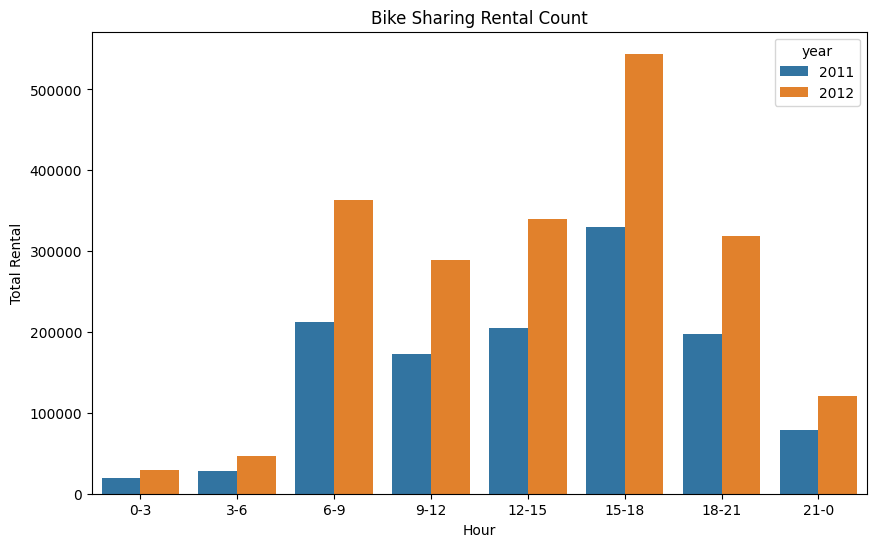

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x='hour', y='total_count', data=hour_count, hue='year')

plt.xlabel("Hour")
plt.ylabel("Total Rental")
plt.title("Bike Sharing Rental Count")

plt.show()

  
*   Bike sharing paling banyak mendapatkan order rental pada jam 15 hingga 18
*   Bike sharing paling sedikit mendapatkan order rental pada jam 0 hingga 3
*   Jumlah pengguna bike sharing dari tahun 2011 ke 2012 meningkat drastis

### Pertanyaan 2: Pada musim apa bike sharing paling banyak mendapatkan order per tahunnya?

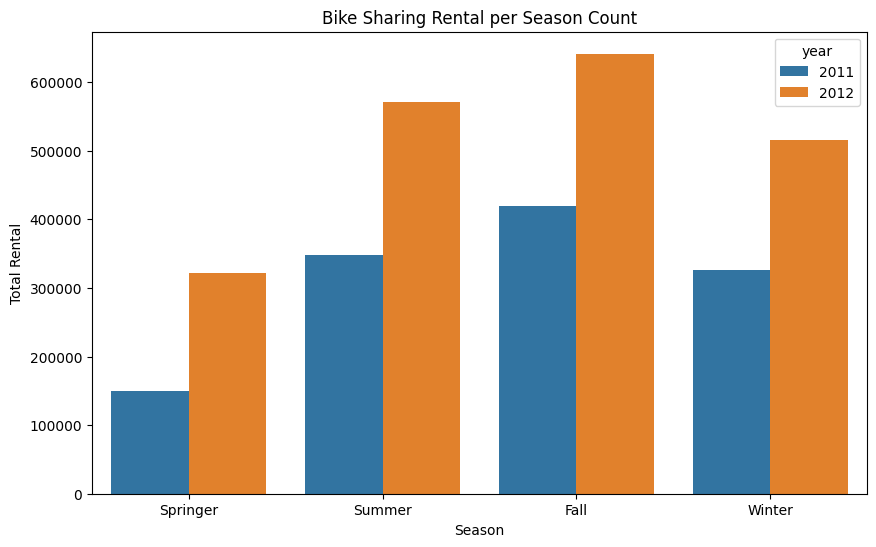

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='total_count', data=season_count, hue='year')

plt.xlabel("Season")
plt.ylabel("Total Rental")
plt.title("Bike Sharing Rental per Season Count")

plt.show()


*   Musim Fall merupakan musim paling banyak mendapatkan order rental
*   Musim Springer merupakan musim yang paling sedikit mendapatkan order rental

## Conclusion

## 1. Pada jam berapa bike sharing paling banyak mendapatkan order per tahunnya?


Pada tahun 2011 dan 2012, bike sharing paling banyak mendapatkan order rental pada jam 15 hingga 18

## 2. Pada musim apa bike sharing paling banyak mendapatkan order per tahunnya?

Musim Fall merupakan musim yang paling banyak mendapatkan order rental baik di tahun 2011 maupun 2012

In [ ]:
hour_df.to_csv("hour_data.csv", index=False)
hour_count.to_csv("hour_count.csv", index=False)